# Projet Numérique 3: Probabilités

## I. Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## II. Questions théoriques

### Question 1 : Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

La loi forte des grands nombres nous autorise à évaluer une espérance conditionnelle par une moyenne empirique. En effet cela revient à calculer l'espérance d'une variable aléatoire selon la loi de probabilité $ P_{X|Y} $. Ainsi il suffit de générer un échantillon ($ l_{1} $,$ l_{2} $,..., $ l_{K} $) de même loi $ P_{X|Y} $ et on pose $ M_{K} = { \sum_{i=0}^{K}} l_{i}$ </strong>. D'après la loi des grands nombres on aura alors $  M_{K}\rightarrow L^{*} $ lorsque $ K\rightarrow \infty $.

### Question 2 : Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

D'après ce qui a été vu en cours, la loi conditionnelle d'un vecteur gaussien (loi de probabilité connaissant quelques-unes de ses composantes) est gaussienne. On peut en déduire sa densité :

$ f_{Z|z=z_{0}}(x) = \frac{1}{(2\pi)^{k/2}\sqrt{det(\Sigma S_{Z})}}exp(-\frac{1}{2}(x-\psi(z_{0}))^{t}(\Sigma S_{Z})^{-1}(x-\psi(z_{0})))$

Où $\psi(z_{0})$ est l'espérance de $Z|z=z_{0}$ et $\Sigma S_{Z}$ est sa matrice de covariance.

### Question 3 : Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1,  quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

Comme $\mathbf{Z}=m+R\mathbf{Y}$, on cherche la loi de $\mathbf{Z}=g(\mathbf{Y})$ où $ g(x)=Rx+m$ est une fonction affine. On utilise les fonctions caractéristiques pour cela. D'après le cours, on a $ \Phi_{\mathbf{Y}}(u) = e^{i<u,0>-\frac{1}{2}<u,I_{d}u>} = e^{-\frac{||\vec{u}||^{2}}{2}} $.
De plus, on sait que $\Phi_{\mathbf{a+BX}}(u) = e^{i<u,a>}*\Phi_{\mathbf{Y}}(B^{t}u) $ d'où :
$ \Phi_{\mathbf{Z}}(u) = \Phi_{\mathbf{m+RY}}(u) = e^{i<u,m>}*\Phi_{\mathbf{Y}}(R^{t}u) = e^{i<u,m>}*e^{-\frac{1}{2}<R^{t}u,R^{t}u>} = e^{i<u,m>}*e^{-\frac{1}{2}<u,RR^{t}u>} = e^{i<u,m>-\frac{1}{2}<u,RR^{t}u>} $
D'après la caractérisation des vecteurs aléatoires par les fonctions caractéristiques on en déduit que Z est un vecteur gaussien d'espérance m et de matrice de covariance $ RR^{t} $

### Question 4: En déduire un algorithme de simulation conditionnelle.

Pour réaliser la simulation conditionnelle de la longueur, on calcule l'esperance et la matrice de covariance des profondeurs inconnues connaissant les profondeurs observées puis on simule le tirage de ces variables à l'aide de la méthode de Box-Muller. Cela nous permet d'obtenir un vecteur gaussien ou les composante suivent une loi normale centrée réduite. Puis on utilise la décomposition de Cholesky de la matrice de covariance conditionnelle afin d'obtenir une simulation de Z car Z = m + LY où m est l'espérance et tel que $C=LL^{t}$

## III. Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## IV. Implémentation

### Préambule

In [4]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
from math import*
import random as random
#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

#### 1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points. On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [5]:
def covariance(h,a,sigma2):
    result = sigma2*np.exp(-abs(h)/a) #d'après la formule donnée précédemment
    return result

#### 2. Calculer la matrice de distance.

In [28]:
dist = np.eye(N,N) #on initialise une matrice de la bonne taille

for i in range(0,N):
    for j in range(0,N):
        dist[i,j] = abs(j-i)*Delta #on remplace chaque valeur
        
print(dist) #on montre la matrice obtenue

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


#### 3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [29]:
Sigma = covariance(dist,a,sigma2) #on applique directement le calcul à la matrice grâce à Numpy
print(Sigma)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


#### 4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [32]:
i=0
Cov_obs = np.array([0.0]*36).reshape(6,6)                    # Matrice de covariance entre les observations
Cov_inc = np.array([0.0]*((N-6)*(N-6))).reshape(N-6,N-6)     # Matrice de covariance entre les inconnues
Cov_inc_obs = np.array([0.0]*((N-6)*6)).reshape(N-6,6)       # Matrice de covariance entre les observations et les inconnues


for p in observation_indexes:
    j=0
    for q in observation_indexes:
        Cov_obs[i][j] = Sigma[p][q] # On calcule les termes pour p et q qui se rapportent à des observations
        j=j+1
    i=i+1
i=0


for p in unknown_indexes:
    j=0
    for q in unknown_indexes:
        Cov_inc[i][j] = Sigma[p][q] # On calcule les termes pour p et q qui se rapportent à des inconnues
        j=j+1
    i=i+1
i=0


for p in unknown_indexes:
    j=0
    for q in observation_indexes:
        Cov_inc_obs[i][j] = Sigma[p][q] # On calcule les termes pour p et q qui se rapportent, l'un, à une inconnue et l'autre à une observation
        j=j+1
    i=i+1
        

Cov_obs_inc = Cov_inc_obs.transpose() # Matrice entre les inconnues et les observations


print(Cov_obs, Cov_inc, Cov_inc_obs) # On affiche ces matrices calculées

[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]] [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221959e-04 9.92688787e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [7.35401941e-04 8.12744838e

#### 5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

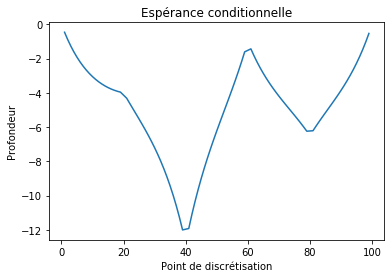

In [48]:
def esperance(Z,mu,Cov_obs,Cov_inc_obs,N):
    moy_inc = np.array([[mu]*(N-6)]).reshape(N-6,1)
    moy_obs = np.array([[mu]*6]).reshape(6,1)
    obs = Z.transpose().reshape(6,1)
    inv = np.linalg.inv(Cov_obs)
    A = np.dot(Cov_inc_obs,inv)
    moy = moy_inc + np.dot(A,(obs-moy_obs))
    return moy
esp_cond = esperance(depth,mu,Cov_obs,Cov_inc_obs,N)
plt.plot(unknown_indexes,esp_cond)
plt.title('Espérance conditionnelle')
plt.xlabel('Point de discrétisation')
plt.ylabel('Profondeur')
plt.show()

#### 6. Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

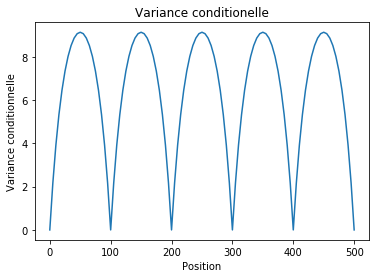

In [49]:
B = np.linalg.inv(Cov_obs)
C = np.dot(Cov_inc_obs,B)
cov_cond = Cov_inc - np.dot(C,Cov_obs_inc)
pos = []
var_cond = [0]*N
t=0

for i in unknown_indexes:
    var_cond[i] = cov_cond[t][t]
    t=t+1
    
plt.plot(discretization,var_cond)
plt.title('Variance conditionelle')
plt.xlabel('Position')
plt.ylabel('Variance conditionnelle')
plt.show()

#### 7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

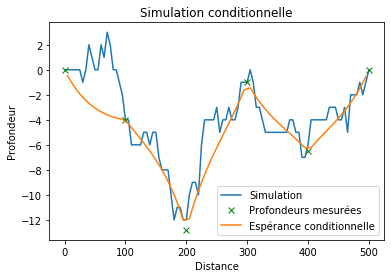

In [47]:
chol = np.linalg.cholesky(cov_cond)


def simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol):
    T = np.array([0]*len(unknown_indexes)).reshape(N-6,1)
    
    for i in range(0,N-6):
        T[i][0] = sqrt(-2*log(random.uniform(0,1)))*cos(2*pi*random.uniform(0,1))
    P = esp_cond + np.dot(chol,T)
    T = np.array([0]*N).reshape(N,1)
    t=0
    
    for i in unknown_indexes:
        T[i][0] = P[t][0]
        t=t+1
    t=0
    
    for i in observation_indexes:
        T[i][0] = depth[t]
        t=t+1
    return T


P = simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)
plt.plot(discretization,P, label = 'Simulation')
plt.plot(np.array(observation_indexes)*5, depth, 'gx', label = 'Profondeurs mesurées')
plt.plot(np.array(unknown_indexes)*5,esp_cond, label = 'Espérance conditionnelle')
plt.title('Simulation conditionnelle')
plt.xlabel('Distance')
plt.ylabel('Profondeur')
plt.legend()
plt.show()

On se rend compte que la simulation suit bel et bien l'espérance conditionnelle qui est la valeur que l'on peut espérer "en moyenne"

#### 8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [50]:
def longueur(delta,vecteur):
    long = 0
    for i in range (0,len(vecteur)-1):
        long = long + sqrt(delta**2+(vecteur[i+1]-vecteur[i])**2) #Pour chaque pas de discrétisation, on calcule la distance à rajouter
    return long

#### 9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

Espérance conditionnelle estimée de la longueur: 512.4904226389807
Longueur de l'espérance conditionnelle: 503.3666634621549


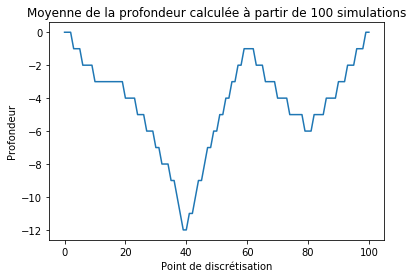

In [56]:
S = 0


for loop in range(0,100):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
long_esti = S/100
print(f'Espérance conditionnelle estimée de la longueur: {long_esti}') # On affiche l'espérance conditionnelle estimée
U = esperance(depth,mu,Cov_obs,Cov_inc_obs,N)


Q = np.array([0]*N).reshape(N,1)
t=0
for i in unknown_indexes:
    Q[i][0] = U[t][0]
    t=t+1
t=0
for i in observation_indexes:
    Q[i][0] = depth[t]
    t=t+1
long_cond = longueur(Delta,Q)
print(f'Longueur de l\'espérance conditionnelle: {long_cond}') # On affiche l'espérance conditionnelle estimée


plt.plot(discretization_indexes,Q) # On trace la profondeur du câble à partir de 100 simulations (moyennée)
plt.title('Moyenne de la profondeur calculée à partir de 100 simulations')
plt.xlabel('Point de discrétisation')
plt.ylabel('Profondeur')
plt.show()

On se rend compte que l'espérance conditionelle est plus élevée car en moyenne chaque simulation aura des pics d'écart avec la réalité. Cette réalité est plus approchée par le lissage observée avec la longueur de l'espérance conditionelle qui ne permet pas de déviation trop importante. Ainsi le résultat obtenu est conforme à nos attentes.

#### 10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

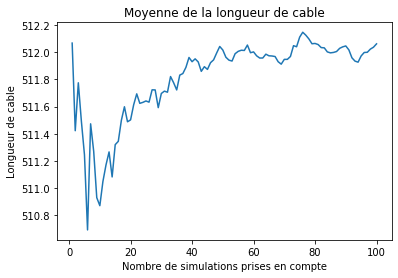

In [52]:
Mn = []
nombre_simul = []
S = 0

for loop in range(0,100):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
    Mn.append(S/(loop+1)) #On rajoute un terme qui correspond à la moyenne à chaque instant
    nombre_simul.append(loop+1)
    
plt.plot(nombre_simul,Mn)
plt.title('Moyenne de la longueur de cable')
plt.xlabel('Nombre de simulations prises en compte')
plt.ylabel('Longueur de cable')
plt.show()

On observe ici que le résultat converge vers une valeur qui semble être proche de 512.3

####  11. Représenter l'histogramme des longueurs de câbles générées.

Calcul de sigma: 1.9726208174913238


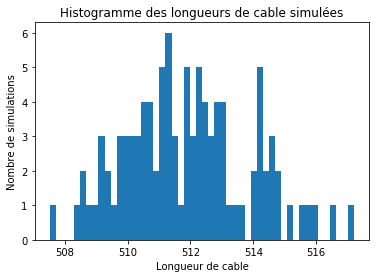

In [64]:
def histo(n):
    data = []
    for i in range (n):
        data.append(longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)))
    return(data, plt.hist(data, bins = 50))

res = histo(100)
stand_dev = np.std(res[0])
print(f'Calcul de sigma: {stand_dev}')

plt.title('Histogramme des longueurs de cable simulées')
plt.xlabel('Longueur de cable')
plt.ylabel('Nombre de simulations')
plt.show()

#### 12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

##### Méthode 1: Calculatoire

On procède tout d'abord par une méthode mécanique basée sur la formule: $IC = \bar{l} \pm t\frac{\sigma}{\sqrt{n}}$

Ici, $t$ est le coefficient critique qui dépend du niveau de confiance que l'on souhaite obtenir. Nous souhaitons un intervalle à 95% donc $t = 1,960$.

Pour les autres valeurs, elles sont actualisées à chaque exécution du programme mais nous donnons des ordres de grandeur.

$\bar{l}$ constitue l'espérance conditionnelle de la longueur du cable estimée ici à environ $512,3$ d'après la question 9.

$\sigma$ correspond à la variance des données de la simulation de la question précédente. On a environ $\sigma = 2$

In [73]:
facteur = 1.96*(stand_dev/10)
inferieur = long_esti - facteur
superieur = long_esti + facteur
print(f'IC = [{inferieur},{superieur}]')

IC = [512.1037889587524,512.877056319209]


##### Méthode 2: Grâce à l'histogramme précédent

On se rend compte que 95% des simulations se trouvent dans l'intervalle $[508, 516]$. On peux donc approximer cet intervalle comme l'IC à 95%. (Nous sommes conscients du peu de pertinence de cette explication mais aucune autre méthode n'a été trouvée)

#### 13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [74]:
#Probabilité de longueur.
mem = 0
for i in range (0,100): # Pour l'approximer, on utilise les fréquences, il n'arrive jamais que la longueur du cable ne dépasse 525m.
    if longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)) > 525:
        mem = mem +1
print(mem/100)


0.0


## 14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

### _Pour 1000 simulations:_

Espérance conditionnelle estimée de la longueur: 512.2319541405902
Longueur de l'espérance conditionnelle: 503.3666634621549


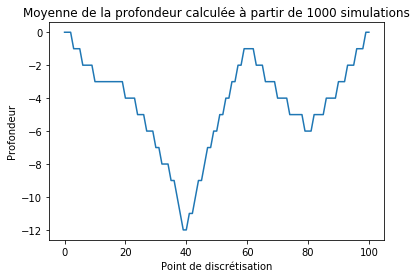

In [89]:
S = 0


for loop in range(0,1000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
long_esti = S/1000
print(f'Espérance conditionnelle estimée de la longueur: {long_esti}') # On affiche l'espérance conditionnelle estimée
U = esperance(depth,mu,Cov_obs,Cov_inc_obs,N)


Q = np.array([0]*N).reshape(N,1)
t=0
for i in unknown_indexes:
    Q[i][0] = U[t][0]
    t=t+1
t=0
for i in observation_indexes:
    Q[i][0] = depth[t]
    t=t+1
long_cond = longueur(Delta,Q)
print(f'Longueur de l\'espérance conditionnelle: {long_cond}') # On affiche l'espérance conditionnelle estimée


plt.plot(discretization_indexes,Q) # On trace la profondeur du câble à partir de 1000 simulations (moyennée)
plt.title('Moyenne de la profondeur calculée à partir de 1000 simulations')
plt.xlabel('Point de discrétisation')
plt.ylabel('Profondeur')
plt.show()

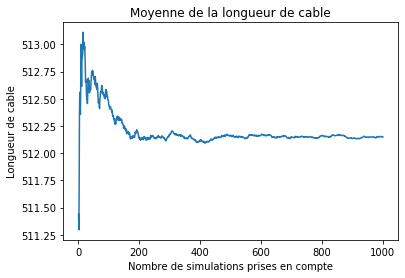

In [75]:
Mn = []
nombre_simul = []
S = 0
for loop in range(0,1000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
    Mn.append(S/(loop+1))
    nombre_simul.append(loop+1)
    
plt.plot(nombre_simul,Mn)
plt.title('Moyenne de la longueur de cable')
plt.xlabel('Nombre de simulations prises en compte')
plt.ylabel('Longueur de cable')
plt.show()

Calcul de sigma: 2.0408673177507284


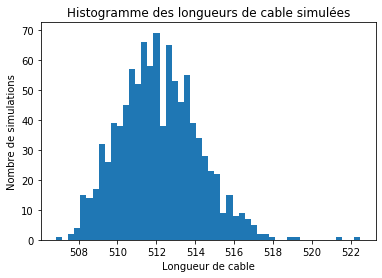

In [76]:
res = histo(1000)
stand_dev = np.std(res[0])
print(f'Calcul de sigma: {stand_dev}')

plt.title('Histogramme des longueurs de cable simulées')
plt.xlabel('Longueur de cable')
plt.ylabel('Nombre de simulations')
plt.show()

In [85]:
facteur = 1.96*(stand_dev/sqrt(1000))
inferieur = long_esti - facteur
superieur = long_esti + facteur
print(f'IC = [{inferieur},{superieur}]')

IC = [512.0237245455705,512.2802775409154]


In [23]:
#Probabilité de longueur.
mem = 0
for i in range (0,1000):
    if longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)) > 525:
        mem = mem +1
print(mem/1000)


0.0


### _Pour 10 000 simulations:_

Espérance conditionnelle estimée de la longueur: 512.1450574748666
Longueur de l'espérance conditionnelle: 503.3666634621549


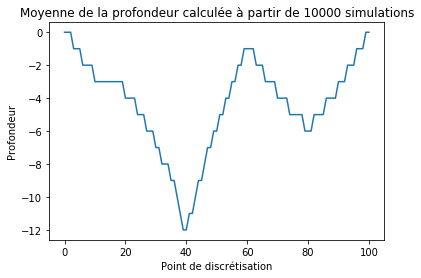

In [90]:
S = 0


for loop in range(0,10000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
long_esti = S/10000
print(f'Espérance conditionnelle estimée de la longueur: {long_esti}') # On affiche l'espérance conditionnelle estimée
U = esperance(depth,mu,Cov_obs,Cov_inc_obs,N)


Q = np.array([0]*N).reshape(N,1)
t=0
for i in unknown_indexes:
    Q[i][0] = U[t][0]
    t=t+1
t=0
for i in observation_indexes:
    Q[i][0] = depth[t]
    t=t+1
long_cond = longueur(Delta,Q)
print(f'Longueur de l\'espérance conditionnelle: {long_cond}') # On affiche l'espérance conditionnelle estimée


plt.plot(discretization_indexes,Q) # On trace la profondeur du câble à partir de 10000 simulations (moyennée)
plt.title('Moyenne de la profondeur calculée à partir de 10000 simulations')
plt.xlabel('Point de discrétisation')
plt.ylabel('Profondeur')
plt.show()

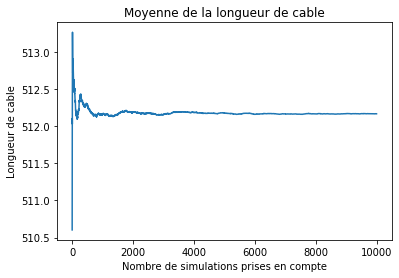

In [92]:
Mn = []
nombre_simul = []
S = 0
for loop in range(0,10000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
    Mn.append(S/(loop+1))
    nombre_simul.append(loop+1)
    
plt.plot(nombre_simul,Mn)
plt.title('Moyenne de la longueur de cable')
plt.xlabel('Nombre de simulations prises en compte')
plt.ylabel('Longueur de cable')
plt.show()

Calcul de sigma: 2.0666660977862414


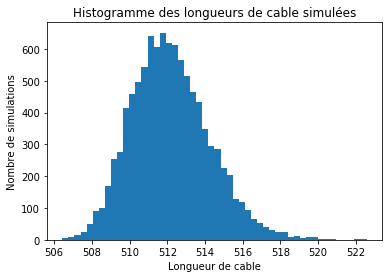

In [77]:
res = histo(10000)
stand_dev = np.std(res[0])
print(f'Calcul de sigma: {stand_dev}')

plt.title('Histogramme des longueurs de cable simulées')
plt.xlabel('Longueur de cable')
plt.ylabel('Nombre de simulations')
plt.show()

In [86]:
facteur = 1.96*(stand_dev/sqrt(10000))
inferieur = long_esti - facteur
superieur = long_esti + facteur
print(f'IC = [{inferieur},{superieur}]')

IC = [512.1114364529516,512.1925656335344]


In [87]:
#Probabilité de longueur.
mem = 0
for i in range (0,10000):
    if longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)) > 525:
        mem = mem +1
print(mem/10000)

0.0


### _Pour 100 000 simulations:_

Espérance conditionnelle estimée de la longueur: 512.1622793473679
Longueur de l'espérance conditionnelle: 503.3666634621549


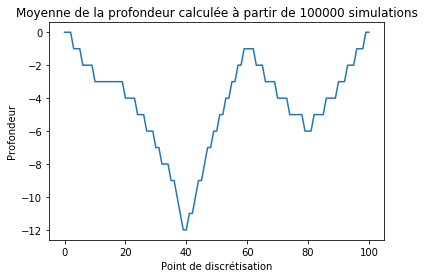

In [91]:
S = 0


for loop in range(0,100000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
long_esti = S/100000
print(f'Espérance conditionnelle estimée de la longueur: {long_esti}') # On affiche l'espérance conditionnelle estimée
U = esperance(depth,mu,Cov_obs,Cov_inc_obs,N)


Q = np.array([0]*N).reshape(N,1)
t=0
for i in unknown_indexes:
    Q[i][0] = U[t][0]
    t=t+1
t=0
for i in observation_indexes:
    Q[i][0] = depth[t]
    t=t+1
long_cond = longueur(Delta,Q)
print(f'Longueur de l\'espérance conditionnelle: {long_cond}') # On affiche l'espérance conditionnelle estimée


plt.plot(discretization_indexes,Q) # On trace la profondeur du câble à partir de 100000 simulations (moyennée)
plt.title('Moyenne de la profondeur calculée à partir de 100000 simulations')
plt.xlabel('Point de discrétisation')
plt.ylabel('Profondeur')
plt.show()

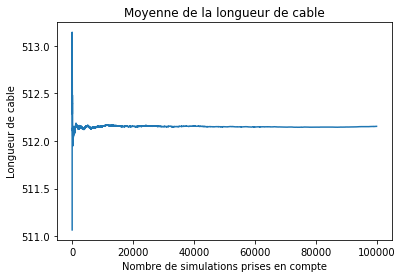

In [93]:
Mn = []
nombre_simul = []
S = 0
for loop in range(0,100000):
    S = S+ longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol))
    Mn.append(S/(loop+1))
    nombre_simul.append(loop+1)
    
plt.plot(nombre_simul,Mn)
plt.title('Moyenne de la longueur de cable')
plt.xlabel('Nombre de simulations prises en compte')
plt.ylabel('Longueur de cable')
plt.show()

Calcul de sigma: 2.0696219536438876


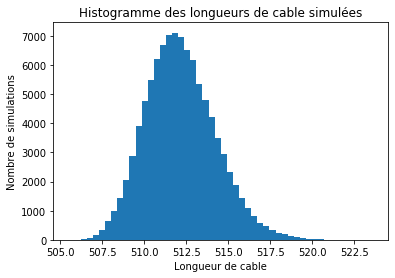

In [78]:
res = histo(100000)
stand_dev = np.std(res[0])
print(f'Calcul de sigma: {stand_dev}')

plt.title('Histogramme des longueurs de cable simulées')
plt.xlabel('Longueur de cable')
plt.ylabel('Nombre de simulations')
plt.show()

In [88]:
facteur = 1.96*(stand_dev/sqrt(100000))
inferieur = long_esti - facteur
superieur = long_esti + facteur
print(f'IC = [{inferieur},{superieur}]')

IC = [512.1391733934757,512.1648286930102]


In [25]:
#Probabilité de longueur.
mem = 0
for i in range (0,100000):
    if longueur(Delta,simulation(N,unknown_indexes,cov_cond,depth,esp_cond,observation_indexes,chol)) > 525:
        mem = mem +1
print(mem/100000)


0.0


## Conclusion

Ce projet nous permet donc d'arriver à de très bonnes approximations qui peuvent être appliquées dans la vie de tous les jours. Par exemple, elle peut être utilisée pour relier différents continents par des gaines de fibre optique tout en surpassant la difficulté de calculs théoriques et en passant par de nombreuses simulations de modèles probabilistes.